In [1]:
%load_ext watermark
%watermark

Last updated: 2023-08-30T09:52:58.138283-06:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.12.2

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 6.2.0-27-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 6
Architecture: 64bit



In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
datos = pd.read_csv("data/datos_procesamiento.csv")
datos.head()

,col_inexistente1,col2,col3,col_outliers,col_outliers2,col_categorica,col_ordinal,col_texto
0,59.0,52.0,2.232832,-50,0.771666,ratón,muy bien,Tenía en su casa una ama que pasaba de los cua...
1,31.0,74.0,0.906147,-5,1.068558,elefante,regular,"El resto della concluían sayo de velarte, calz..."
2,81.0,28.0,0.626750,-32,0.846396,ratón,muy mal,"El resto della concluían sayo de velarte, calz..."
3,34.0,16.0,0.816738,-84,0.637381,gato,mal,"Una olla de algo más vaca que carnero, salpicó..."
4,32.0,28.0,0.571131,65,4.540614,gato,bien,Tenía en su casa una ama que pasaba de los cua...


In [4]:
datos.dtypes

col_inexistente1    float64
col2                float64
col3                float64
col_outliers          int64
col_outliers2       float64
col_categorica       object
col_ordinal          object
col_texto            object
dtype: object

In [5]:
datos.shape

(1000, 8)

# Variables Numéricas

**Imputación de datos**

In [6]:
from sklearn import preprocessing

In [7]:
datos.dtypes

col_inexistente1    float64
col2                float64
col3                float64
col_outliers          int64
col_outliers2       float64
col_categorica       object
col_ordinal          object
col_texto            object
dtype: object

In [8]:
var_numericas_df = datos.select_dtypes([int, float])
var_numericas_df.columns

Index(['col_inexistente1', 'col2', 'col3', 'col_outliers', 'col_outliers2'], dtype='object')

In [9]:
var_numericas_df[var_numericas_df.isnull().any(axis=1)].shape

(96, 5)

In [10]:
var_numericas_df[var_numericas_df.isnull().any(axis=1)].head()

,col_inexistente1,col2,col3,col_outliers,col_outliers2
9,NaN,53.0,2.270999,62,1.067230
10,NaN,99.0,1.394209,98,4.145716
16,NaN,50.0,0.437365,59,20.549474
17,NaN,73.0,0.324893,98,0.761684
23,NaN,85.0,3.664671,-48,3.154153


In [19]:
>>> from sklearn.impute import SimpleImputer
imputador = SimpleImputer(strategy="mean")

In [20]:
var_numericas_imputadas = imputador.fit_transform(var_numericas_df)

In [21]:
var_numericas_imputadas

array([[ 59.        ,  52.        ,   2.23283208, -50.        ,
          0.77166646],
       [ 31.        ,  74.        ,   0.90614714,  -5.        ,
          1.06855838],
       [ 81.        ,  28.        ,   0.62675042, -32.        ,
          0.84639576],
       ...,
       [ 19.        ,  53.        ,   0.73723413,  73.        ,
          1.34525201],
       [ 88.        ,  94.        ,   0.76008706,  68.        ,
          1.3692463 ],
       [ 94.        ,  56.        ,   1.2299403 ,  61.        ,
          0.94395714]])

In [22]:
var_numericas_imputadas.shape

(1000, 5)

In [23]:
var_numericas_imputadas_df = pd.DataFrame(var_numericas_imputadas,
                                                   index=var_numericas_df.index,
                                                   columns=var_numericas_df.columns)

var_numericas_imputadas_df.head(10)

,col_inexistente1,col2,col3,col_outliers,col_outliers2
0,59.000000,52.0,2.232832,-50.0,0.771666
1,31.000000,74.0,0.906147,-5.0,1.068558
2,81.000000,28.0,0.626750,-32.0,0.846396
3,34.000000,16.0,0.816738,-84.0,0.637381
4,32.000000,28.0,0.571131,65.0,4.540614
5,81.000000,4.0,1.618844,51.0,0.812940
6,57.000000,31.0,0.167880,78.0,1.235137
7,34.000000,20.0,20.229813,93.0,1.283176
8,37.000000,96.0,2.407978,54.0,1.298613
9,48.382743,53.0,2.270999,62.0,1.067230


In [24]:
var_numericas_imputadas_df[var_numericas_imputadas_df.isnull().any(axis=1)].shape

(0, 5)

** Estandarización**

El proceso de Estandardización es un proceso requerido por una gran cantidad de modelos en Scikit-learn. El objetivo es obtener una variable con media 0 y desviación estándar 1.

In [25]:
var_numericas_df.columns

Index(['col_inexistente1', 'col2', 'col3', 'col_outliers', 'col_outliers2'], dtype='object')

In [26]:
var_numericas_df.mean()

col_inexistente1     48.382743
col2                 49.660000
col3                  1.466095
col_outliers          4.253000
col_outliers2       131.193340
dtype: float64

In [27]:
var_numericas_df.std()

col_inexistente1      27.987174
col2                  28.272668
col3                   1.732358
col_outliers          78.145901
col_outliers2       3401.164776
dtype: float64

Para ello el transformador mas sencillo en sklearn es [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [28]:
escalador = preprocessing.StandardScaler()
var_numericas_imputadas_escalado_standard = escalador.fit_transform(var_numericas_imputadas)

In [29]:
escalador.mean_

array([ 48.38274336,  49.66      ,   1.46609489,   4.253     ,
       131.19333968])

In [30]:
var_numericas_imputadas_escalado_standard.mean(axis=0)

array([-5.86197757e-17,  1.26121336e-16, -3.90798505e-17,  3.55271368e-18,
       -3.55271368e-18])

In [31]:
var_numericas_imputadas_escalado_standard.std(axis=0)

array([1., 1., 1., 1., 1.])

In [32]:
var_numericas_imputadas_escalado_standard[0]

array([ 0.39921733,  0.08280686,  0.44281884, -0.69460006, -0.03836537])

Para aquellos casos en los que los datos tengan muchos valores extremos, es posible que estandarizar usando la media y la desviacion estandar no funcione bien en el modelo. Para esos casos es mejor usar unos estimadores mas robustos (menos sensibles a outliers) y emplear un [RobustScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler) que funciona substrayendo la mediana y escalando mediante el rango intercuartil (IQR).

In [33]:
escalador_robusto = preprocessing.RobustScaler()
var_numericas_imputadas_escalado_robusto = escalador_robusto.fit_transform(
                                                        var_numericas_imputadas)

In [34]:
var_numericas_imputadas_escalado_robusto.mean(axis=0)

array([-3.81916720e-17, -2.85106383e-02,  4.01958704e-01,  3.04018692e-02,
        7.03130782e+01])

In [35]:
var_numericas_imputadas_escalado_robusto.std(axis=0)

array([6.33218559e-01, 6.01245275e-01, 1.38651621e+00, 7.29970260e-01,
       1.83690817e+03])

**Escalado a un rango especifico**

Hay casos en los que en vez de estandardizar queremos escalar los datos a un rango (generalmente [-1,1] o [0,1]). Para ello podemos usar [MinMaxScaler](scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler) que hace escalado minmax (obviamente) o [MaxAbscaler](scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbscaler) que simplemente divide cada valor de una variable por su valor máximo (y por tanto convierte el valor maximo a 1).

In [36]:
var_numericas_imputadas.min()

-100.0

In [37]:
var_numericas_imputadas.max()

107357.85777352

In [38]:
escalador_minmax = preprocessing.MinMaxScaler()
var_numericas_imputadas_escalado_minmax = escalador_minmax.fit_transform(var_numericas_imputadas)

In [39]:
var_numericas_imputadas_escalado_minmax.max()

1.0000000000000002

In [40]:
var_numericas_imputadas_escalado_minmax.min()

0.0

In [41]:
escalador_maxabs = preprocessing.MaxAbsScaler()
var_numericas_imputadas_escalado_maxabs = escalador_maxabs.fit_transform(var_numericas_imputadas)

In [42]:
var_numericas_imputadas_escalado_maxabs.max()

1.0

In [43]:
var_numericas_imputadas_escalado_maxabs.min()

-0.1122334455667789

Hay casos en los que lo que se necesita es tener observaciones con norma unitaria (norma L2 o euclidiana). Para esos casos, podemos usar [Normalizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)

In [44]:
normalizador = preprocessing.Normalizer()
var_numericas_imputadas_normal = normalizador.fit_transform(var_numericas_imputadas)

Hay que tener en cuenta que el objetivo del Normalizer es normalizar casos, no variables (o sea que funciona por filas)

In [45]:
var_numericas_imputadas_normal[1,:]

array([ 0.38557802,  0.92041204,  0.01127066, -0.06219   ,  0.01329073])

In [46]:
np.linalg.norm(var_numericas_imputadas_normal[1,:])

1.0

**Otras transformaciones**

Para aquellos casos en los que queremos aplicar una función arbitraria a una variable podemos usar [FunctionTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer)

Por ejemplo, la variable `col3` no tiene una distribución normal, sino que tiene una asimetria muy marcada (es una distribución lognormal). 

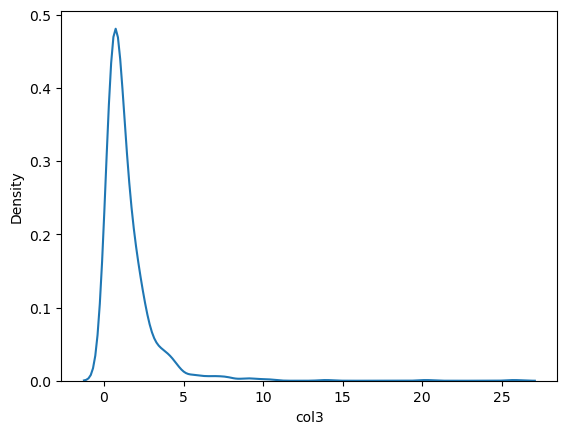

In [95]:
sns.kdeplot(datos.col3);

Una práctica frecuente es aplicar el logaritmo a dichas variables para convertirlas a variables con una distribución mas normal.

In [96]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)

In [97]:
col3_transformada = transformer.transform(datos[["col3"]])
col3_transformada = col3_transformada.reshape(col3_transformada.shape[0],)
sns.kdeplot(col3_transformada);

AttributeError: 'DataFrame' object has no attribute 'reshape'

<hr>

### Variables Categoricas

Los modelos están diseñados para trabajar con variables numéricas. Esto implica que para poder entrenar los modelos con variables categóricas tenemos que convertirlas a números. Este proceso se llama *codificación (encoding)*

In [50]:
datos = pd.read_csv("data/datos_procesamiento.csv")
datos.head()

,col_inexistente1,col2,col3,col_outliers,col_outliers2,col_categorica,col_ordinal,col_texto
0,59.0,52.0,2.232832,-50,0.771666,ratón,muy bien,Tenía en su casa una ama que pasaba de los cua...
1,31.0,74.0,0.906147,-5,1.068558,elefante,regular,"El resto della concluían sayo de velarte, calz..."
2,81.0,28.0,0.626750,-32,0.846396,ratón,muy mal,"El resto della concluían sayo de velarte, calz..."
3,34.0,16.0,0.816738,-84,0.637381,gato,mal,"Una olla de algo más vaca que carnero, salpicó..."
4,32.0,28.0,0.571131,65,4.540614,gato,bien,Tenía en su casa una ama que pasaba de los cua...


In [51]:
var_categoricas = datos[['col_categorica', 'col_ordinal']]

In [52]:
var_categoricas.head()

,col_categorica,col_ordinal
0,ratón,muy bien
1,elefante,regular
2,ratón,muy mal
3,gato,mal
4,gato,bien


Hay muchas formas de codificar variables, la más sencilla es reemplazar los elementos de dichas variables por un número. Por ejemplo, si hacemos esto con la columna `col_categorica`:

In [53]:
label_codificador = preprocessing.LabelEncoder()
label_codificador.fit(datos.col_ordinal) 

LabelEncoder()

In [54]:
label_codificador.classes_

array(['bien', 'mal', 'muy bien', 'muy mal', 'regular'], dtype=object)

In [55]:
label_codificador.transform(['muy bien', 'muy mal', 'muy bien', 'muy mal', 'bien'])

array([2, 3, 2, 3, 0])

In [56]:
label_codificador.inverse_transform([0, 0, 1, 2])

array(['bien', 'bien', 'mal', 'muy bien'], dtype=object)

En el caso de variables ordinales esto tiene sentido ya que `muy_bien>bien>regular>mal>muy mal`. Sin embargo, esto indica a los modelos de scikit-learn por ejemplo que `mal + regular = bien`. Esto se puede usar en según que casos (hay modelos que no interpretan las variables numéricas así), o para codificar las variables objetivo.

Para variables categóricas (por ejemplo animales) no tiene sentido usar este tipo de encoding. 

In [57]:
label_codificador_categorico = preprocessing.LabelEncoder()
label_codificador_categorico.fit_transform(datos.col_categorica)[:10]

array([3, 0, 3, 1, 1, 2, 2, 2, 0, 0])

In [58]:
label_codificador_categorico.classes_

array(['elefante', 'gato', 'perro', 'ratón'], dtype=object)

Digamos que no tiene sentido decir que la media de `elefante` y `perro` no es `gato`

Para estos casos una técnica que se puede usar se llama `one-hot encoding`. Lo que significa es que creamos n columnas binarias, con el valor 0 por defecto salvo la columna referente a la observación.

Para esto podemos usar 
[OneHotEncoder](scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [59]:
oh_codificador = preprocessing.OneHotEncoder()

In [66]:
datos.col_categorica.shape

(1000,)

In [65]:
oh_codificador.fit(datos.col_categorica)

ValueError: Expected 2D array, got 1D array instead:
array=['ratón' 'elefante' 'ratón' 'gato' 'gato' 'perro' 'perro' 'perro'
 'elefante' 'elefante' 'perro' 'elefante' 'gato' 'ratón' 'gato' 'ratón'
 'elefante' 'ratón' 'ratón' 'elefante' 'ratón' 'ratón' 'ratón' 'gato'
 'gato' 'ratón' 'gato' 'elefante' 'gato' 'elefante' 'elefante' 'elefante'
 'elefante' 'ratón' 'elefante' 'gato' 'elefante' 'gato' 'gato' 'gato'
 'gato' 'ratón' 'elefante' 'gato' 'gato' 'perro' 'elefante' 'gato'
 'elefante' 'perro' 'ratón' 'perro' 'elefante' 'ratón' 'ratón' 'gato'
 'gato' 'elefante' 'ratón' 'perro' 'gato' 'gato' 'gato' 'gato' 'ratón'
 'elefante' 'elefante' 'perro' 'gato' 'ratón' 'perro' 'elefante' 'gato'
 'gato' 'ratón' 'ratón' 'elefante' 'perro' 'ratón' 'ratón' 'elefante'
 'gato' 'perro' 'ratón' 'gato' 'elefante' 'elefante' 'perro' 'perro'
 'perro' 'ratón' 'gato' 'ratón' 'gato' 'gato' 'elefante' 'gato' 'gato'
 'perro' 'perro' 'ratón' 'perro' 'gato' 'elefante' 'ratón' 'perro' 'gato'
 'gato' 'ratón' 'gato' 'perro' 'perro' 'perro' 'gato' 'perro' 'perro'
 'elefante' 'perro' 'ratón' 'gato' 'gato' 'gato' 'gato' 'ratón' 'ratón'
 'ratón' 'perro' 'elefante' 'elefante' 'perro' 'ratón' 'gato' 'elefante'
 'gato' 'ratón' 'ratón' 'elefante' 'gato' 'perro' 'ratón' 'gato'
 'elefante' 'elefante' 'elefante' 'elefante' 'perro' 'elefante' 'elefante'
 'gato' 'ratón' 'perro' 'perro' 'gato' 'perro' 'perro' 'elefante' 'gato'
 'perro' 'perro' 'perro' 'perro' 'gato' 'ratón' 'gato' 'gato' 'gato'
 'perro' 'ratón' 'ratón' 'elefante' 'ratón' 'ratón' 'elefante' 'elefante'
 'ratón' 'elefante' 'elefante' 'elefante' 'ratón' 'ratón' 'gato' 'perro'
 'elefante' 'elefante' 'gato' 'gato' 'perro' 'elefante' 'elefante'
 'elefante' 'ratón' 'perro' 'perro' 'gato' 'ratón' 'gato' 'perro' 'ratón'
 'elefante' 'ratón' 'ratón' 'gato' 'ratón' 'gato' 'ratón' 'elefante'
 'gato' 'gato' 'perro' 'elefante' 'perro' 'perro' 'gato' 'elefante'
 'elefante' 'elefante' 'gato' 'perro' 'gato' 'perro' 'elefante' 'elefante'
 'elefante' 'elefante' 'perro' 'gato' 'gato' 'elefante' 'ratón' 'perro'
 'perro' 'ratón' 'ratón' 'perro' 'perro' 'elefante' 'elefante' 'perro'
 'gato' 'perro' 'ratón' 'perro' 'ratón' 'gato' 'ratón' 'perro' 'elefante'
 'gato' 'gato' 'ratón' 'ratón' 'perro' 'gato' 'ratón' 'ratón' 'perro'
 'elefante' 'gato' 'ratón' 'perro' 'elefante' 'ratón' 'elefante' 'perro'
 'ratón' 'perro' 'perro' 'perro' 'ratón' 'ratón' 'ratón' 'perro'
 'elefante' 'perro' 'elefante' 'gato' 'elefante' 'elefante' 'elefante'
 'elefante' 'ratón' 'elefante' 'ratón' 'elefante' 'perro' 'ratón' 'gato'
 'elefante' 'perro' 'perro' 'ratón' 'perro' 'ratón' 'gato' 'gato' 'perro'
 'gato' 'ratón' 'perro' 'elefante' 'gato' 'perro' 'gato' 'elefante'
 'perro' 'ratón' 'gato' 'perro' 'elefante' 'elefante' 'gato' 'ratón'
 'gato' 'elefante' 'perro' 'perro' 'ratón' 'gato' 'ratón' 'gato' 'perro'
 'gato' 'perro' 'ratón' 'ratón' 'perro' 'ratón' 'gato' 'gato' 'ratón'
 'ratón' 'gato' 'perro' 'elefante' 'elefante' 'gato' 'ratón' 'gato'
 'ratón' 'gato' 'ratón' 'elefante' 'ratón' 'ratón' 'elefante' 'elefante'
 'gato' 'elefante' 'ratón' 'elefante' 'perro' 'elefante' 'elefante'
 'perro' 'gato' 'gato' 'elefante' 'perro' 'perro' 'perro' 'perro' 'gato'
 'perro' 'ratón' 'ratón' 'gato' 'elefante' 'gato' 'gato' 'perro' 'ratón'
 'perro' 'perro' 'elefante' 'ratón' 'ratón' 'gato' 'perro' 'perro'
 'elefante' 'gato' 'perro' 'gato' 'gato' 'ratón' 'ratón' 'gato' 'perro'
 'gato' 'ratón' 'perro' 'perro' 'ratón' 'gato' 'perro' 'perro' 'gato'
 'gato' 'perro' 'elefante' 'ratón' 'ratón' 'perro' 'elefante' 'elefante'
 'gato' 'ratón' 'elefante' 'perro' 'ratón' 'elefante' 'perro' 'perro'
 'gato' 'elefante' 'elefante' 'elefante' 'ratón' 'perro' 'gato' 'gato'
 'ratón' 'ratón' 'ratón' 'perro' 'elefante' 'gato' 'gato' 'gato' 'perro'
 'elefante' 'gato' 'elefante' 'elefante' 'elefante' 'ratón' 'gato' 'perro'
 'elefante' 'elefante' 'elefante' 'ratón' 'elefante' 'perro' 'ratón'
 'ratón' 'ratón' 'elefante' 'ratón' 'ratón' 'gato' 'ratón' 'perro' 'perro'
 'ratón' 'gato' 'elefante' 'perro' 'gato' 'gato' 'ratón' 'elefante'
 'ratón' 'ratón' 'ratón' 'gato' 'ratón' 'perro' 'elefante' 'ratón' 'ratón'
 'ratón' 'perro' 'ratón' 'ratón' 'perro' 'perro' 'gato' 'perro' 'ratón'
 'perro' 'elefante' 'ratón' 'elefante' 'gato' 'perro' 'gato' 'elefante'
 'ratón' 'perro' 'perro' 'gato' 'perro' 'gato' 'gato' 'perro' 'gato'
 'elefante' 'elefante' 'ratón' 'ratón' 'gato' 'gato' 'gato' 'perro'
 'elefante' 'gato' 'ratón' 'elefante' 'elefante' 'ratón' 'ratón' 'perro'
 'gato' 'gato' 'elefante' 'elefante' 'ratón' 'elefante' 'gato' 'ratón'
 'gato' 'gato' 'ratón' 'perro' 'ratón' 'elefante' 'ratón' 'elefante'
 'gato' 'gato' 'gato' 'gato' 'perro' 'gato' 'gato' 'ratón' 'perro'
 'elefante' 'gato' 'gato' 'ratón' 'perro' 'elefante' 'ratón' 'ratón'
 'elefante' 'ratón' 'perro' 'gato' 'perro' 'perro' 'perro' 'perro' 'gato'
 'ratón' 'gato' 'elefante' 'perro' 'gato' 'perro' 'ratón' 'ratón' 'perro'
 'elefante' 'elefante' 'elefante' 'perro' 'perro' 'ratón' 'perro' 'perro'
 'ratón' 'ratón' 'ratón' 'gato' 'perro' 'gato' 'gato' 'ratón' 'ratón'
 'gato' 'perro' 'gato' 'ratón' 'perro' 'perro' 'perro' 'ratón' 'ratón'
 'ratón' 'elefante' 'gato' 'gato' 'elefante' 'gato' 'gato' 'ratón' 'ratón'
 'ratón' 'perro' 'perro' 'elefante' 'elefante' 'elefante' 'elefante'
 'elefante' 'perro' 'ratón' 'ratón' 'ratón' 'gato' 'ratón' 'gato' 'gato'
 'elefante' 'elefante' 'elefante' 'perro' 'ratón' 'perro' 'perro' 'perro'
 'gato' 'ratón' 'elefante' 'perro' 'elefante' 'elefante' 'elefante'
 'elefante' 'elefante' 'perro' 'elefante' 'perro' 'ratón' 'elefante'
 'elefante' 'perro' 'gato' 'ratón' 'ratón' 'elefante' 'elefante' 'gato'
 'ratón' 'ratón' 'ratón' 'elefante' 'ratón' 'ratón' 'perro' 'perro'
 'perro' 'elefante' 'elefante' 'elefante' 'gato' 'ratón' 'elefante'
 'ratón' 'gato' 'perro' 'gato' 'elefante' 'gato' 'ratón' 'gato' 'gato'
 'elefante' 'gato' 'gato' 'elefante' 'perro' 'perro' 'gato' 'perro' 'gato'
 'ratón' 'gato' 'ratón' 'perro' 'perro' 'ratón' 'elefante' 'perro' 'perro'
 'gato' 'perro' 'gato' 'perro' 'elefante' 'ratón' 'elefante' 'perro'
 'perro' 'gato' 'perro' 'perro' 'gato' 'ratón' 'gato' 'gato' 'elefante'
 'gato' 'perro' 'gato' 'gato' 'perro' 'gato' 'ratón' 'ratón' 'perro'
 'gato' 'gato' 'elefante' 'ratón' 'perro' 'elefante' 'elefante' 'ratón'
 'ratón' 'perro' 'gato' 'perro' 'ratón' 'gato' 'gato' 'perro' 'perro'
 'perro' 'gato' 'perro' 'elefante' 'elefante' 'perro' 'perro' 'elefante'
 'ratón' 'gato' 'ratón' 'gato' 'elefante' 'elefante' 'perro' 'ratón'
 'gato' 'elefante' 'perro' 'perro' 'gato' 'gato' 'ratón' 'perro' 'perro'
 'ratón' 'perro' 'ratón' 'gato' 'perro' 'elefante' 'ratón' 'ratón' 'perro'
 'gato' 'perro' 'perro' 'perro' 'elefante' 'perro' 'gato' 'ratón' 'ratón'
 'perro' 'ratón' 'gato' 'gato' 'ratón' 'perro' 'ratón' 'ratón' 'perro'
 'elefante' 'gato' 'ratón' 'elefante' 'elefante' 'perro' 'gato' 'perro'
 'perro' 'gato' 'ratón' 'perro' 'ratón' 'gato' 'ratón' 'elefante'
 'elefante' 'perro' 'elefante' 'perro' 'gato' 'ratón' 'gato' 'perro'
 'elefante' 'elefante' 'ratón' 'elefante' 'ratón' 'elefante' 'elefante'
 'ratón' 'perro' 'perro' 'perro' 'elefante' 'ratón' 'gato' 'gato' 'gato'
 'perro' 'elefante' 'elefante' 'elefante' 'gato' 'elefante' 'perro' 'gato'
 'elefante' 'elefante' 'ratón' 'gato' 'gato' 'ratón' 'perro' 'elefante'
 'perro' 'perro' 'perro' 'elefante' 'perro' 'perro' 'elefante' 'perro'
 'elefante' 'gato' 'elefante' 'gato' 'gato' 'perro' 'gato' 'ratón'
 'elefante' 'perro' 'perro' 'perro' 'elefante' 'perro' 'ratón' 'gato'
 'elefante' 'gato' 'ratón' 'gato' 'gato' 'ratón' 'elefante' 'gato'
 'elefante' 'elefante' 'gato' 'perro' 'gato' 'elefante' 'perro' 'ratón'
 'elefante' 'elefante' 'elefante' 'elefante' 'perro' 'ratón' 'perro'
 'ratón' 'gato' 'elefante' 'ratón' 'ratón' 'perro' 'elefante' 'ratón'
 'ratón' 'perro' 'gato' 'elefante' 'ratón' 'ratón' 'gato' 'gato'
 'elefante' 'perro' 'elefante' 'perro' 'gato' 'perro' 'perro' 'perro'
 'perro' 'ratón' 'ratón' 'gato' 'perro' 'gato' 'elefante' 'perro' 'ratón'
 'perro' 'ratón' 'perro' 'gato' 'elefante' 'ratón' 'gato' 'perro' 'ratón'
 'perro' 'elefante' 'gato' 'ratón' 'perro' 'elefante' 'ratón' 'ratón'
 'ratón' 'perro' 'gato' 'gato' 'gato' 'perro' 'ratón' 'perro' 'ratón'
 'elefante' 'perro' 'perro' 'ratón' 'elefante' 'ratón' 'elefante' 'ratón'
 'gato' 'gato' 'gato' 'perro' 'elefante' 'gato' 'perro' 'gato' 'ratón'
 'ratón' 'gato' 'elefante' 'gato' 'elefante' 'elefante' 'gato' 'ratón'
 'ratón' 'ratón' 'gato' 'elefante' 'perro' 'perro' 'elefante' 'ratón'
 'perro' 'elefante' 'ratón' 'gato' 'perro' 'ratón' 'gato' 'gato' 'ratón'
 'ratón' 'gato' 'perro' 'perro' 'perro' 'elefante' 'gato' 'ratón' 'ratón'
 'elefante' 'ratón' 'elefante' 'elefante' 'elefante'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Vemos que OneHotEncoder falla cuando se le pasan strings en vez de numeros. Por ello primero tenemos que convertir las variables categóricas a numéricas usando LabelEncoder.

In [67]:
categorias_codificadas = label_codificador_categorico.transform(datos.col_categorica)

In [68]:
categorias_codificadas

array([3, 0, 3, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 3, 1, 3, 0, 3, 3, 0, 3, 3,
       3, 1, 1, 3, 1, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 1, 1, 3, 0, 1,
       1, 2, 0, 1, 0, 2, 3, 2, 0, 3, 3, 1, 1, 0, 3, 2, 1, 1, 1, 1, 3, 0,
       0, 2, 1, 3, 2, 0, 1, 1, 3, 3, 0, 2, 3, 3, 0, 1, 2, 3, 1, 0, 0, 2,
       2, 2, 3, 1, 3, 1, 1, 0, 1, 1, 2, 2, 3, 2, 1, 0, 3, 2, 1, 1, 3, 1,
       2, 2, 2, 1, 2, 2, 0, 2, 3, 1, 1, 1, 1, 3, 3, 3, 2, 0, 0, 2, 3, 1,
       0, 1, 3, 3, 0, 1, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 1, 3, 2, 2, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 1, 3, 1, 1, 1, 2, 3, 3, 0, 3, 3, 0, 0, 3, 0,
       0, 0, 3, 3, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0, 3, 2, 2, 1, 3, 1, 2, 3,
       0, 3, 3, 1, 3, 1, 3, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 2, 1, 1, 0, 3, 2, 2, 3, 3, 2, 2, 0, 0, 2, 1, 2, 3, 2,
       3, 1, 3, 2, 0, 1, 1, 3, 3, 2, 1, 3, 3, 2, 0, 1, 3, 2, 0, 3, 0, 2,
       3, 2, 2, 2, 3, 3, 3, 2, 0, 2, 0, 1, 0, 0, 0, 0, 3, 0, 3, 0, 2, 3,
       1, 0, 2, 2, 3, 2, 3, 1, 1, 2, 1, 3, 2, 0, 1,

In [63]:
categorias_codificadas.shape

(1000,)

In [69]:
categorias_oh_codificadas = oh_codificador.fit_transform(categorias_codificadas.reshape(1000,1))
categorias_oh_codificadas

<1000x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

Vemos que por defecto `OneHotEncoder` no devuelve un numpy array, sino una matriz `sparse`. La traducción sería "matriz escasa", y es una manera de representar matrices con muchos ceros (como es el caso de OneHot encoding) para consumir poca memoria.

Podemos convertir dichas matrices a arrays facilmente:

In [70]:
categorias_oh_codificadas.toarray()

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

Vemos ahora la comparación en memoria de una matriz sparse versus su correspondiente np.array usando la función `sys.getsizeof` que devuelve el uso de memoria un objeto de python en bytes.

In [71]:
import sys
sys.getsizeof(categorias_oh_codificadas)

48

In [72]:
sys.getsizeof(categorias_oh_codificadas.toarray())

32128

Si queremos que el encoder devuelva arrays no tenemos más que pasarle el parametro `sparse=False`.

In [73]:
oh_codificador = preprocessing.OneHotEncoder(sparse=False)

categorias_oh_codificadas = oh_codificador.fit_transform(categorias_codificadas.reshape(1000,1))
categorias_oh_codificadas

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [74]:
oh_codificador.feature_indices_

AttributeError: 'OneHotEncoder' object has no attribute 'feature_indices_'

Pandas tiene la funcion auxiliar `get_dummies` que hace esto automáticamente de forma más fácil.

In [75]:
pd.get_dummies(datos.col_categorica).head()

,elefante,gato,perro,ratón
0,False,False,False,True
1,True,False,False,False
2,False,False,False,True
3,False,True,False,False
4,False,True,False,False


### Texto

In [78]:
from sklearn import feature_extraction

In [79]:
datos.col_texto.values[:10]

array(['Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera.',
       'El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino.',
       'El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino.',
       'Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda.',
       'Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera.',
       'En un lugar de la Mancha, de cuyo nom

Para convertir texto en variables numéricas, podemos proceder de igual forma que con las variables categóricas, simplemente separando las palabras antes.

Para ello tenemos dos vectorizadores en scikit-learn, que convierten texto en vectores.


[CountVectorizer]() devuelve un vector con el valor 0 en todas las palabras que no existen en una frase y con el numero de ocurrencias de las palabras que si existen

Vamos a hacer un ejemplo para que se vea bien.

In [80]:
ejemplo_frases = ['los coches rojos',
          'los aviones son rojos',
          'los coches y los aviones son rojos',
          'los camiones rojos'
                 ]


vectorizador_count = feature_extraction.text.CountVectorizer()
X = vectorizador_count.fit_transform(ejemplo_frases)
X

<4x6 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [83]:
vectorizador_count.get_feature_names_out()

array(['aviones', 'camiones', 'coches', 'los', 'rojos', 'son'],
      dtype=object)

In [85]:
pd.DataFrame(X.toarray(), columns=vectorizador_count.get_feature_names_out())

,aviones,camiones,coches,los,rojos,son
0,0,0,1,1,1,0
1,1,0,0,1,1,1
2,1,0,1,2,1,1
3,0,1,0,1,1,0


El tomar simplemente el número de veces que aparece cada palabra tiene un problema, y es que da un mayor peso a aquellas palabras que aparecen muchas veces pero que no aportan ningun valor semántico (por ejemplo, `los`). Una manera más sofisticada de vectorizar un texto es en vez de usar el número de apariciones, usar TF-IDF. TF-IDF se traduce como Frecuencia de Texto - Frecuencia Inversa de Documento, y es una medida que asigna pesos a cada palabra en función de su frecuencia de aparición en todos los documents.

In [89]:
vectorizador_tfidf = feature_extraction.text.TfidfVectorizer()
X = vectorizador_tfidf.fit_transform(ejemplo_frases)
pd.DataFrame(X.toarray(), columns=vectorizador_tfidf.get_feature_names_out())

,aviones,camiones,coches,los,rojos,son
0,0.000000,0.000000,0.730064,0.483222,0.483222,0.000000
1,0.589645,0.000000,0.000000,0.390280,0.390280,0.589645
2,0.438931,0.000000,0.438931,0.581047,0.290524,0.438931
3,0.000000,0.804612,0.000000,0.419880,0.419880,0.000000


In [90]:
vectorizador_tfidf = feature_extraction.text.TfidfVectorizer()
texto_vectorizado = vectorizador_tfidf.fit_transform(datos.col_texto)
texto_vectorizado

<1000x134 sparse matrix of type '<class 'numpy.float64'>'
	with 28295 stored elements in Compressed Sparse Row format>

In [91]:
texto_vectorizado = texto_vectorizado.toarray()

In [92]:
label_codificador.classes_

array(['bien', 'mal', 'muy bien', 'muy mal', 'regular'], dtype=object)

** Poniendolo todo junto **

In [101]:
from sklearn.impute import SimpleImputer
col_numericas =  ['col_inexistente1', 'col2', 'col3', 'col_outliers', 'col_outliers2']
col_categorica = ['col_categorica']
col_texto = ['col_texto']


#Variables numéricas
imputador = SimpleImputer(strategy="mean")
escalador = preprocessing.StandardScaler()
var_numericas_imputadas_escalado_standard = escalador.fit_transform(
                                                imputador.fit_transform(datos[col_numericas])
                                            )
df_numerico_procesado = pd.DataFrame(var_numericas_imputadas_escalado_standard,
                                                   columns=col_numericas)


# Variable categorica
label_codificador_categorico = preprocessing.LabelEncoder()
categorias_codificadas = label_codificador_categorico.fit_transform(datos[col_categorica])
oh_codificador = preprocessing.OneHotEncoder(sparse=False)
categorias_oh_codificadas = oh_codificador.fit_transform(categorias_codificadas.reshape(1000,1))

df_categorico_procesado = pd.DataFrame(categorias_oh_codificadas, 
                                       columns=label_codificador_categorico.classes_)


# Texto
vectorizador_tfidf = feature_extraction.text.TfidfVectorizer()
texto_vectorizado = vectorizador_tfidf.fit_transform(datos.col_texto)
df_texto_procesado =  pd.DataFrame(texto_vectorizado.toarray(), columns=vectorizador_tfidf.get_feature_names_out())


datos_procesados = pd.concat([
    df_numerico_procesado,
    df_categorico_procesado,
    df_texto_procesado 
], axis=1)

# variable ordinal
label_codificador_ordinal = preprocessing.LabelEncoder()
datos_procesados['col_ordinal'] = label_codificador_ordinal.fit_transform(datos.col_ordinal) 

/home/carlostr/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
datos_procesados

,col_inexistente1,col2,col3,col_outliers,col_outliers2,elefante,gato,perro,ratón,acordarme,...,vaca,veinte,velarte,vellori,velludo,verdad,verosímiles,viernes,vivía,col_ordinal
0,0.399217,0.082807,0.442819,-0.694600,-0.038365,0.0,0.0,0.0,1.0,0.000000,...,0.000000,0.204745,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2
1,-0.653605,0.861333,-0.323390,-0.118466,-0.038278,1.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.181842,0.181842,0.181842,0.0,0.0,0.000000,0.000000,4
2,1.226435,-0.766494,-0.484752,-0.464146,-0.038343,0.0,0.0,0.0,1.0,0.000000,...,0.000000,0.000000,0.181842,0.181842,0.181842,0.0,0.0,0.000000,0.000000,3
3,-0.540803,-1.191145,-0.375028,-1.129901,-0.038405,0.0,1.0,0.0,0.0,0.000000,...,0.194272,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.194272,0.000000,1
4,-0.616004,-0.766494,-0.516874,0.777743,-0.037257,0.0,1.0,0.0,0.0,0.000000,...,0.000000,0.204745,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.376838,0.365907,0.492254,0.611304,-0.038492,1.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,3
996,-0.352799,-1.615795,0.131503,0.700925,-0.037878,0.0,0.0,0.0,1.0,0.000000,...,0.000000,0.204745,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2
997,-1.104815,0.118194,-0.420944,0.880166,-0.038197,1.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.181842,0.181842,0.181842,0.0,0.0,0.000000,0.000000,4
998,1.489641,1.569084,-0.407745,0.816152,-0.038190,1.0,0.0,0.0,0.0,0.197887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.197887,0
